# ADS 505 Final Project: Credit Card Churn

## Set-Up

In [72]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import random

# Data Preprocessing Imports
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Model building & evaluation imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.feature_selection import RFECV
from dmba import gainsChart, liftChart
%matplotlib inline

In [2]:
# Set all random seeds to 42
seed_value = 42

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

In [38]:
# Hide warnings to make code cleaner
import warnings
warnings.filterwarnings('ignore')

## Import Data & EDA

In [10]:
#Bank_df = pd.read_csv("Data/BankChurners.csv")
Bank_df = pd.read_csv("BankChurners.csv")
Bank_df = Bank_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [4]:
Bank_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [87]:
missing_values_count = Bank_df.isnull().sum()
print(missing_values_count)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [88]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(array([1402.,    0., 3561.,    0., 1535.,    0., 1790.,    0.,  727.,
        1112.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

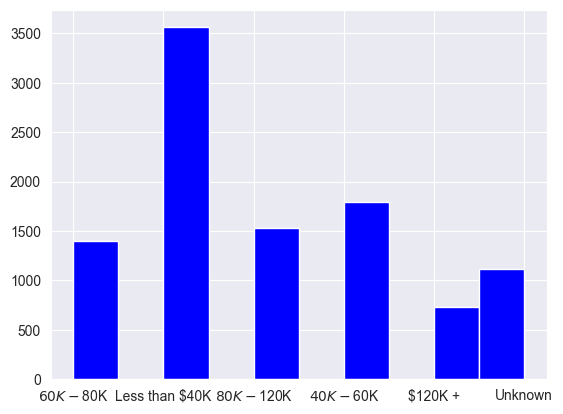

In [89]:
plt.hist(Bank_df["Income_Category"], bins = 10, color = 'blue')

In [90]:
# Select numerical columns
numerical_columns = Bank_df.select_dtypes(include=['number'])

# Display numerical columns
print(numerical_columns)

       CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      768805383            45                3              39   
1      818770008            49                5              44   
2      713982108            51                3              36   
3      769911858            40                4              34   
4      709106358            40                3              21   
...          ...           ...              ...             ...   
10122  772366833            50                2              40   
10123  710638233            41                2              25   
10124  716506083            44                1              36   
10125  717406983            30                2              36   
10126  714337233            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                 

In [91]:
correlation_matrix = numerical_columns.corr()

<Axes: >

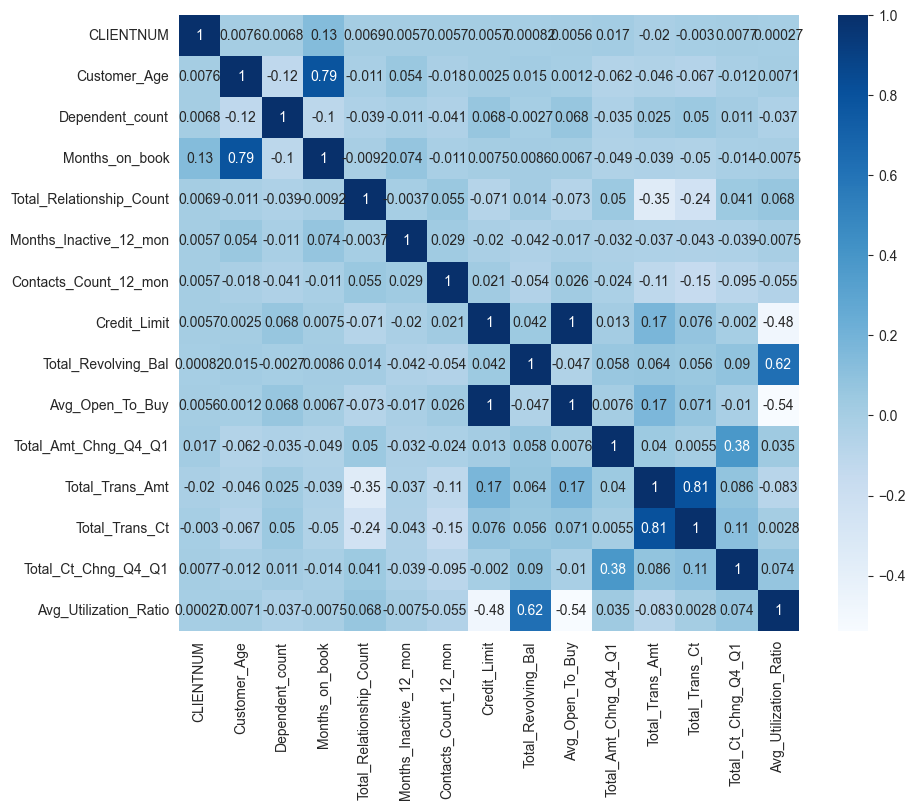

In [92]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues')

(array([110.,  29.,  56.,  70.,  91., 106., 127., 146., 184., 221., 260.,
        303., 333., 361., 379., 426., 473., 500., 486., 490., 479., 472.,
        947., 398., 376., 387., 307., 279., 262., 223., 157., 157., 127.,
         93.,  93.,  65.,  43., 101.,   2.,   4.,   2.,   0.,   1.,   0.,
          1.]),
 array([26.        , 27.04444444, 28.08888889, 29.13333333, 30.17777778,
        31.22222222, 32.26666667, 33.31111111, 34.35555556, 35.4       ,
        36.44444444, 37.48888889, 38.53333333, 39.57777778, 40.62222222,
        41.66666667, 42.71111111, 43.75555556, 44.8       , 45.84444444,
        46.88888889, 47.93333333, 48.97777778, 50.02222222, 51.06666667,
        52.11111111, 53.15555556, 54.2       , 55.24444444, 56.28888889,
        57.33333333, 58.37777778, 59.42222222, 60.46666667, 61.51111111,
        62.55555556, 63.6       , 64.64444444, 65.68888889, 66.73333333,
        67.77777778, 68.82222222, 69.86666667, 70.91111111, 71.95555556,
        73.        ]),
 <BarCon

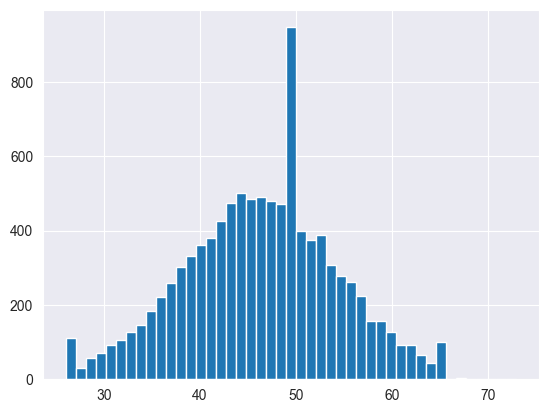

In [98]:
plt.hist(Bank_df['Customer_Age'], bins = 45)

C:\Users\Jeremiah\AppData\Local\Temp\ipykernel_16488\4285311919.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank_df['Customer_Age'])
C:\Users\Jeremiah\anaconda3\envs\ADS505_Module1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jeremiah\anaconda3\envs\ADS505_Module1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

<Axes: xlabel='Customer_Age', ylabel='Density'>

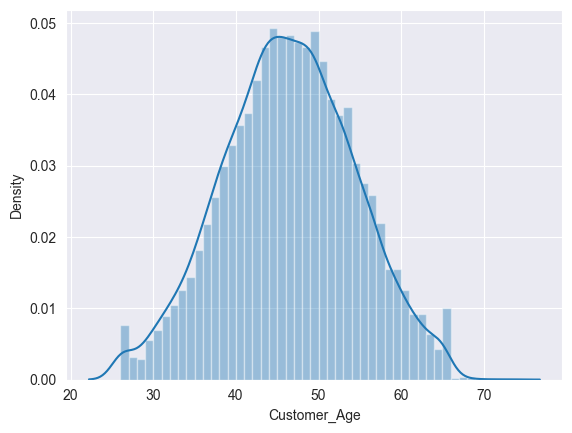

In [101]:
sns.distplot(Bank_df['Customer_Age'])

C:\Users\Jeremiah\anaconda3\envs\ADS505_Module1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jeremiah\anaconda3\envs\ADS505_Module1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jeremiah\anaconda3\envs\ADS505_Module1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jeremiah\anaconda3\envs\ADS505_Module1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='Education_Level', ylabel='count'>

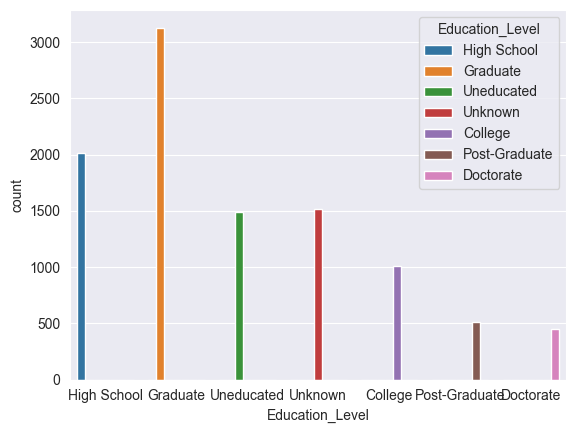

In [108]:
sns.countplot(data = Bank_df, x = 'Education_Level', hue = 'Education_Level')

## Data Pre-Processing for ML

In [11]:
# Drop the numerical client identifier
Bank_df = Bank_df.drop(['CLIENTNUM'], axis=1)

### Convert Categorical Columns to Numerical

In [7]:
# Check which categorical columns only have binary values 
print(Bank_df["Gender"].unique())
print(Bank_df["Card_Category"].unique())

['M' 'F']
['Blue' 'Gold' 'Silver' 'Platinum']


In [14]:
# Convert categorical columns to dummies
Bank_df = pd.get_dummies(Bank_df, columns=['Gender', 'Card_Category', 'Education_Level',
                                                      'Marital_Status', 'Income_Category'])
#Bank_df.head()

In [13]:
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  object 
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Months_on_book                  10127 non-null  int64  
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Avg_Open_To_Buy                 10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 11  Total_Trans_Amt                 10127 non-null  int64  
 12  Total_Trans_Ct                  

In [15]:
# Drop one of the 2 cols for Gender bc it's binary to decrease multicollinearity issues
Bank_df = Bank_df.drop(['Gender_F'], axis=1)

### Stratified Train-Test Split & Scale Dataset

In [21]:
# Split the data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(Bank_df.drop(['Attrition_Flag'], axis=1), Bank_df['Attrition_Flag'], test_size=0.3, random_state = 42, stratify=Bank_df['Attrition_Flag'])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7088, 36)
(3039, 36)
(7088,)
(3039,)


In [22]:
# scale the features using standard scaler
scaler = StandardScaler()

# fit the scaler with training data only
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data
X_test_scaled = scaler.transform(X_test)

### Balance Dataset (SMOTE)

Before: Counter({'Existing Customer': 5949, 'Attrited Customer': 1139})


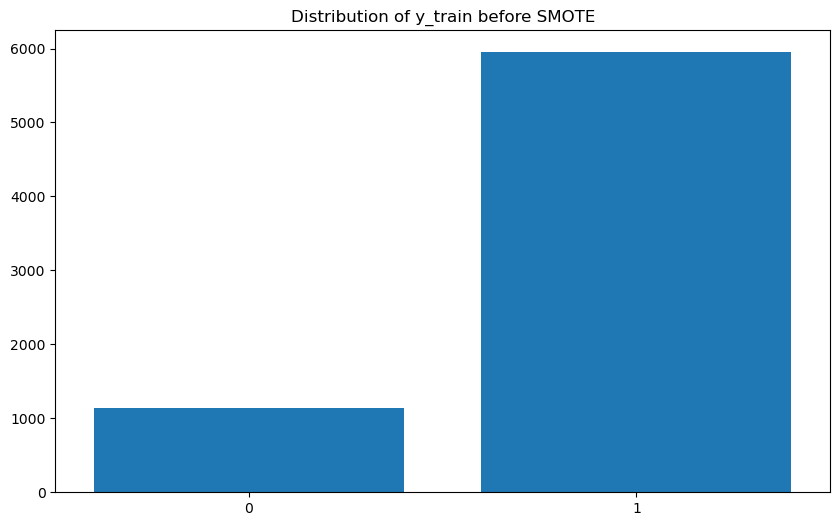

In [25]:
# Check distribution of target variable before using SMOTE
counter = Counter(y_train)
print("Before:", counter)
plt.figure(figsize=(10, 6))
plt.bar(counter.keys(), counter.values(), tick_label=[0, 1])
plt.title('Distribution of y_train before SMOTE')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.show()

In [26]:
# Implement SMOTE
smote = SMOTE(random_state = 42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

After: Counter({'Attrited Customer': 5949, 'Existing Customer': 5949})


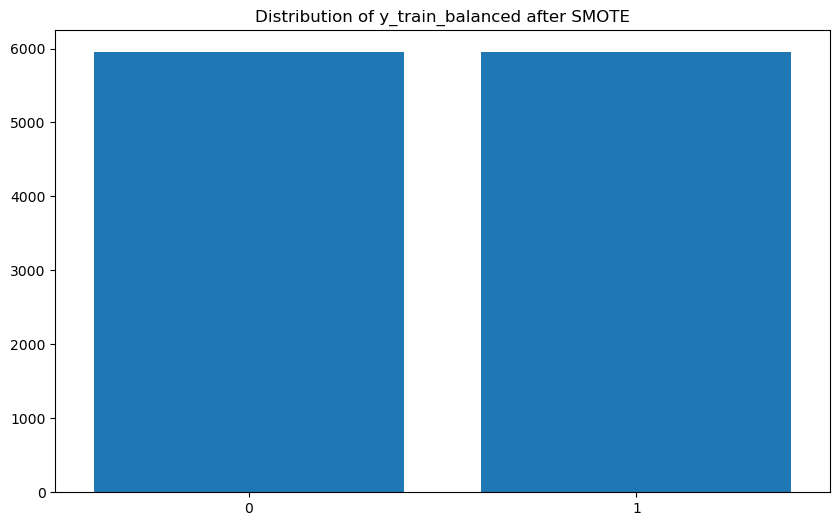

In [27]:
# Check distribution of target variable after SMOTE
counter = Counter(y_train_balanced)
print("After:", counter)
plt.figure(figsize=(10, 6))
plt.bar(counter.keys(), counter.values(), tick_label=[0, 1])
plt.title('Distribution of y_train_balanced after SMOTE')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.show()

## Model Building

### Testing Various Models & Hyperparams

In [45]:
# Loop through same models & hyperparameters as earlier
models = [
    ('Logistic Regression', LogisticRegression(random_state=42), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
    }),
    ('Decision Tree', DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('Random Forest', RandomForestClassifier(random_state=42), {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('KNN', KNeighborsClassifier(), {  # KNN does not have a random_state parameter
        'n_neighbors': [3, 5, 7, 9, 11],
    }),
    ('AdaBoost', AdaBoostClassifier(random_state=42), {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    }),
    ('SVM', SVC(probability=True, random_state=42), {
        'C': [0.1, 1, 10],
        'kernel': ['rbf'],
        'gamma': ['scale']
    }),
]

In [46]:
# Perform Grid Search CV (5-fold) for above models again using balanced training dataset
# Store the best models and their scores
best_models = {}
best_scores = {}
best_params = {}

for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5, scoring='roc_auc')
    grid.fit(X_train_balanced, y_train_balanced)
    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_
    best_params[name] = grid.best_params_

In [47]:
# Print the best scores and the best parameters for each model on the balanced dataset
for name in best_models:
    print(f"{name}: Best Score = {best_scores[name]}")
    print(f"Best Parameters = {best_params[name]}\n")

Logistic Regression: Best Score = 0.94250530434308
Best Parameters = {'C': 1, 'penalty': 'l2'}

Decision Tree: Best Score = 0.9646189188384996
Best Parameters = {'max_depth': 5}

Random Forest: Best Score = 0.9971641271954287
Best Parameters = {'max_depth': 20, 'n_estimators': 200}

KNN: Best Score = 0.958539420537423
Best Parameters = {'n_neighbors': 7}

AdaBoost: Best Score = 0.9938905664279268
Best Parameters = {'learning_rate': 1, 'n_estimators': 200}

SVM: Best Score = 0.9904027434354734
Best Parameters = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



### Get AUC of Optimal Model (Random Forest) on Test Set
The Random Forest model performed the best with the hyperparameters listed above, so we will use that going forward. 

In [48]:
# Random Forest
rf = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
rf_pred = rf.predict_proba(X_test_scaled)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)
print(f'Random Forest AUC: {rf_auc}')

Random Forest AUC: 0.9824992288462898


### Try Recursive Feature Elimination (RFE)
Trying out RFE to see if we can keep the model performance while decreasing model complexity & potential multicollinearity issues.

In [51]:
rf = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='roc_auc')
rfecv.fit(X_train_balanced, y_train_balanced)

# Print the optimal number & ranking of features
print(f"Optimal number of features : {rfecv.n_features_}")
print(rfecv.ranking_)

# Transform the training data to just RFE # of features
X_train_balanced_optimal = rfecv.transform(X_train_balanced)
X_test_scaled_optimal = rfecv.transform(X_test_scaled)

# Refit the model on the optimal feature data & predict
rf.fit(X_train_balanced_optimal, y_train_balanced)
rf_pred_optimal = rf.predict_proba(X_test_scaled_optimal)[:, 1]

# Compute AUC on test set
rf_auc_optimal = roc_auc_score(y_test, rf_pred_optimal)
print(f'Optimal Random Forest RFE AUC: {rf_auc_optimal}')

Optimal number of features : 33
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Optimal Random Forest RFE AUC: 0.9817160258593545


In [54]:
# Print selected feature names
selected_features_mask = rfecv.get_support()
selected_feature_names = X_train.columns[selected_features_mask]
print("Selected Feature Names:")
print(selected_feature_names)

Selected Feature Names:
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Card_Category_Blue', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown'],
      dtype='object')


In [57]:
# Print features removed by RFE
selected_features = set(selected_feature_names)
all_features = set(X_train.columns)
print(all_features - selected_features)

{'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'}


We can use the RFE model because it's a very minimal drop in AUC, but will make the model slightly simpler/less time-consuming and decrease multicollinearity issues from the card category dummy variables.

## Model Results

### Model Metrics

In [58]:
# Classification Report
y_pred = rf.predict(X_test_scaled_optimal)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.86      0.83      0.84       488
Existing Customer       0.97      0.97      0.97      2551

         accuracy                           0.95      3039
        macro avg       0.91      0.90      0.91      3039
     weighted avg       0.95      0.95      0.95      3039



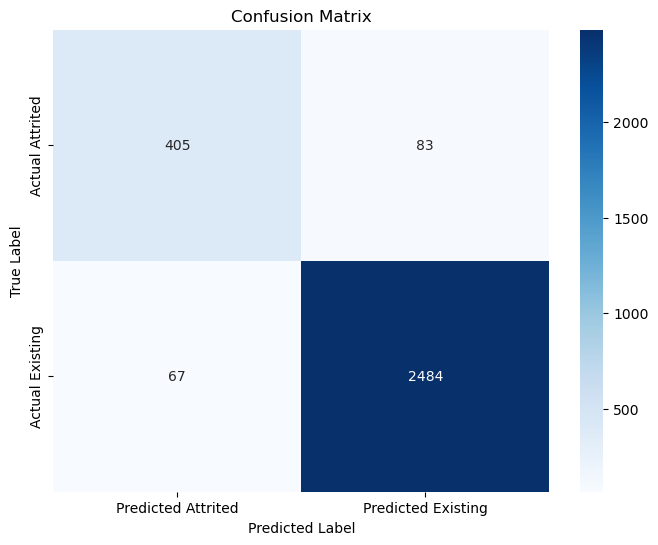

In [62]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Attrited', 'Predicted Existing'], 
            yticklabels=['Actual Attrited', 'Actual Existing'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

### Lift & Gains Charts

In [70]:
# Encode y for charts
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

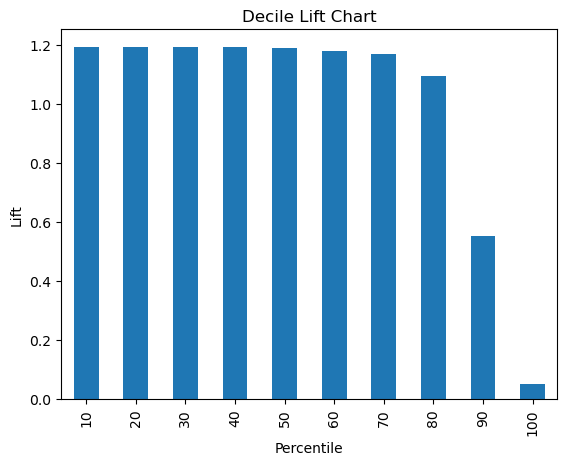

In [73]:
# Decile Lift Chart
y_pred_prob = rf.predict_proba(X_test_scaled_optimal)[:, 1]
df = pd.DataFrame({'actual': y_test_encoded, 'predicted': y_pred_prob})
df = df.sort_values(by='predicted', ascending=False)

liftChart(df['actual'], labelBars=False)
plt.ylabel('Lift')
plt.show()

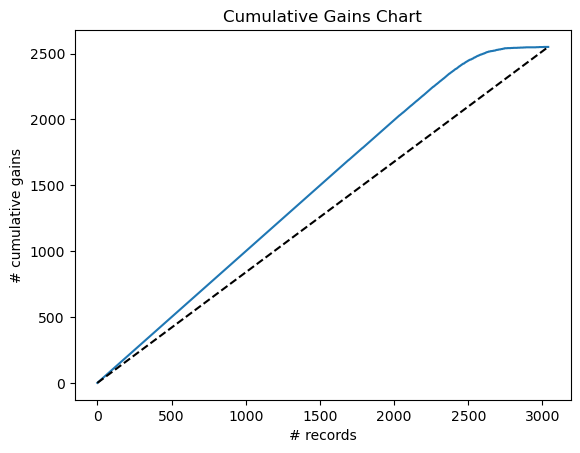

In [75]:
# Cumulative Gains Chart
gainsChart(df.actual)
plt.title('Cumulative Gains Chart')
plt.show()

### Feature Importance Graph for Final Model

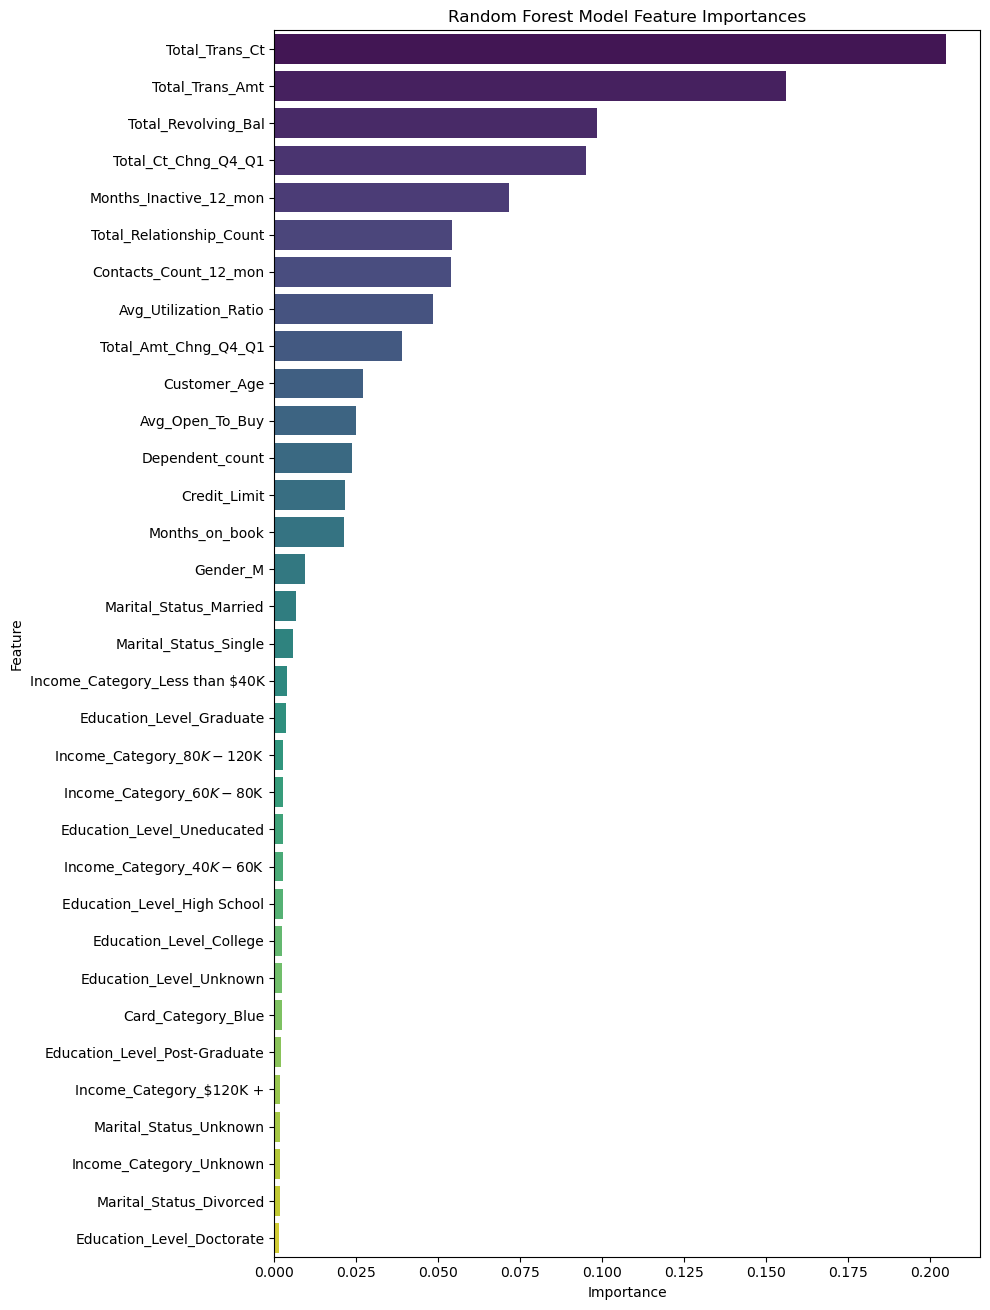

In [78]:
# Extract and map feature importances
feature_importances = rf.feature_importances_
feature_names = X_train.columns[selected_features_mask]
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features based on importance and convert to df
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
df_feature_importances = pd.DataFrame(sorted_features, columns=['Feature', 'Importance'])

# Plotting
plt.figure(figsize=(10, len(sorted_features) * 0.4))
sns.barplot(x="Importance", y="Feature", data=df_feature_importances, palette='viridis')
plt.title('Random Forest Model Feature Importances')
plt.tight_layout()
plt.show()

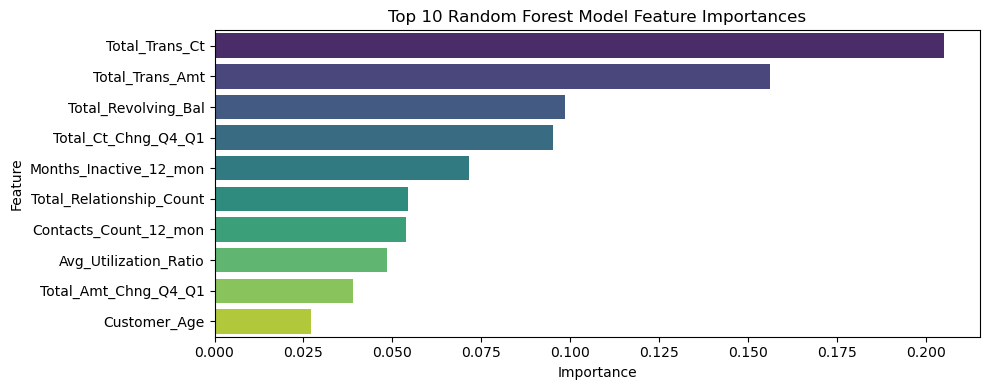

In [79]:
# Use only top 10 features for ease of reading graph
# Limit sorted_features to top 10 and convert to df
top_10_features = sorted_features[:10]  # take only the top 10 features
df_feature_importances = pd.DataFrame(top_10_features, columns=['Feature', 'Importance'])

# Plotting
plt.figure(figsize=(10, len(top_10_features) * 0.4))
sns.barplot(x="Importance", y="Feature", data=df_feature_importances, palette='viridis')
plt.title('Top 10 Random Forest Model Feature Importances')
plt.tight_layout()
plt.show()

### Thresholding for Final Model
Based on different business needs, different classification thresholds may be used. The AUC remains constant throughout thresholds, but business needs may lend to a higher tolerance for FPs vs. FNs or vica-versa.

In [84]:
# Define the thresholds
thresholds = np.arange(0.25, 0.8, 0.05)
results = []

# Get TP, TN, FP, & FN at each threshold & append to results
for thresh in thresholds:
    rf_pred_class = (y_pred_prob > thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_encoded, rf_pred_class).ravel()
    results.append([thresh, tp, tn, fp, fn])

# Print results df
df_results = pd.DataFrame(results, columns=['Threshold', 'TP', 'TN', 'FP', 'FN'])
print(df_results)

    Threshold    TP   TN   FP   FN
0        0.25  2540  283  205   11
1        0.30  2532  308  180   19
2        0.35  2523  338  150   28
3        0.40  2516  365  123   35
4        0.45  2499  387  101   52
5        0.50  2484  403   85   67
6        0.55  2462  419   69   89
7        0.60  2435  441   47  116
8        0.65  2404  452   36  147
9        0.70  2348  464   24  203
10       0.75  2283  469   19  268
